# Simulation de variables aléatoire

L'objectif de ce projet est de simuler pour comprendre ce qu'est une variable aléatoire. 

Nous simulerons d'abord le jeu de *pile ou face* puis le *lancé de dé*. 
À partir des *histogrammes* issus des tirages aléatoires de ces deux expériences nous allons aborder la notion de *fonction de répartition* dans le cadre des variables aléatoires discrètes. 

Votre mission va être ensuite d'explorer ces caractéristique pour d'autres variables aléatoires.


In [1]:
import random, bisect
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Some useful functions

def flipCoin(n):
    # On simule n lancés d'une pièce équilibrée
    values = []
    for i in range(n):
        s = random.random()
        if s < 0.5:
            values.append(0)
        else:
            values.append(1)
    return(values)


def rollDie(n):
    # On simule n lancés d'un dé non truqué
    values = []
    for i in range(n):
        s = random.random()
        if s < 1./6:
            values.append(1)
        elif s < 2./6:
            values.append(2)
        elif s < 3./6:
            values.append(3)
        elif s < 4./6:
            values.append(4)
        elif s < 5./6:
            values.append(5)
        else:
            values.append(6)
    return(values)

def simulateRV(probVect, n):
    # Simule une variable aleatoire à partir d'un vecteur de proba
    values = []
    if (min(probVect) < 0) or (sum(probVect) != 1):
        print("No valid probability vector")
        return([])
    p = [probVect[0]]
    for i in range(1, len(probVect)):
        p.append(p[-1] + probVect[i])
    for i in range(n):
        s = random.random()
        values.append(bisect.bisect(p, s))
    return(values)
    

# Pile ou Face ?

In [3]:
n = 10000
values = flipCoin(n)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 12: ordinal not in range(128)

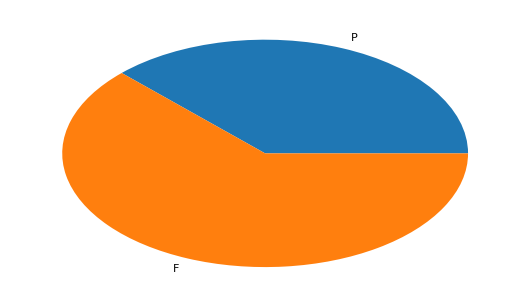

In [4]:
random.seed(51)
nValues = [2**i for i in range(4,16,2)]
labels = 'P','F'
i = 321
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for n in nValues :
    values = flipCoin(n)
    nPile = values.count(0)
    fracs = [nPile,n-nPile]
    ax = plt.subplot(i)
    plt.pie(fracs,labels=labels)
    ax.set_title("pour "+str(n)+" lancés %pile = "+str(nPile/n*100))
    plt.axis('equal')
    i +=1
    

Que peut-on observer sur le nombre de piles et de faces ?

In [5]:
nb0 = values.count(0)
nb1 = values.count(1)

In [6]:
print(nb0, nb1)

8150 8234


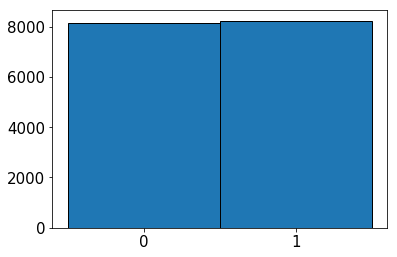

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(values, bins=[-0.5, 0.5, 1.5], histtype='bar', ec='black')
ax.set_xticks([0, 1])
ax.tick_params(labelsize=15)
plt.show()

# Lancé du dé

In [8]:
dValues = rollDie(n)

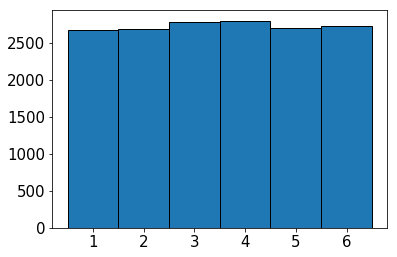

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dValues, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], histtype='bar', ec='black')
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.tick_params(labelsize=15)
plt.show()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 12: ordinal not in range(128)

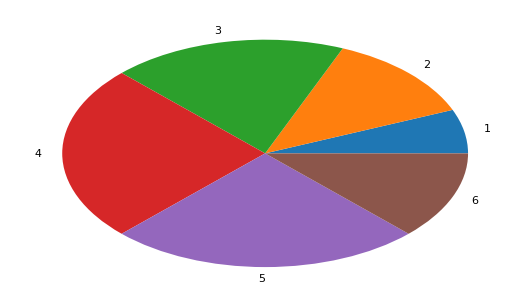

In [5]:
random.seed(133)
nValues = [2**i for i in range(4,16,2)]
labels = '1','2','3','4','5','6'
i = 321
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for n in nValues :
    values = rollDie(n)
    fracs = [values.count(nombre) for nombre in range(1,7)]
    ax = plt.subplot(i)
    plt.pie(fracs,labels=labels)
    ax.set_title("pour "+str(n)+" lancés % 1 = "+str(fracs[0]/n*100))
    plt.axis('equal')
    i +=1
    

À vous de jouer !
------
* À partir des codes précédents simuler le lancé d'une piece chargée (biasée) suivant une loi de Bernouilli (https://fr.wikipedia.org/wiki/Loi_de_Bernoulli) avec $$p \neq \frac{1}{2}$$
* À partir de votre implémentation de la loi de Bernouilli simuler une loi Binomiale (https://fr.wikipedia.org/wiki/Loi_binomiale)


In [6]:
import numpy as np

def Bern(p):
    # on tire une variable aléatoire uniforme sur [0,1]
    # si la variable est inférieure à p on renvoie 1 
    # sinon on revoie 0
    unif = np.random.rand() 
    if unif < p :
        return 1
    else:
        return 0
  
l = []
nbVariable = 10000
for i in range(nbVariable):
    a = Bern(0.75)
    l += [a]
    
sommeTotale = 0.
for el in l:
    sommeTotale += el

sommeTotale /= float(len(l))
print(" on espere que : ",sommeTotale," soit proche de 0.75")



(' on espere que : ', 0.7495, ' soit proche de 0.75')


In [7]:
def Bin(n,p):
    somme = 0
    for k in range(n):
        somme += Bern(p)
    return somme

s = []
Total = 0.
NbIterations = 50
for i in range(NbIterations):
    S = Bin(400,0.25)
    s += [S]
    Total += S
print(s)
print("Espérance : 100")
Total /= float(NbIterations)
print("Espérance obtenue",Total)



[95, 109, 102, 92, 90, 96, 104, 91, 93, 84, 104, 96, 108, 103, 119, 92, 95, 94, 92, 95, 94, 85, 101, 91, 92, 100, 110, 93, 109, 103, 109, 107, 96, 101, 89, 91, 92, 105, 81, 94, 99, 93, 102, 118, 110, 109, 86, 109, 102, 97]
Espérance : 100
('Esp\xc3\xa9rance obtenue', 98.44)


*Jeu du Loto*
=====
> Dans cette partie nous allons simuler le jeu du loto de campagne $\neq$ **l'euro-million** :
[![Alt text](https://img.youtube.com/vi/CReE48ulVd8/0.jpg)](https://www.youtube.com/watch?v=CReE48ulVd8)


objectifs :
-----
* L'objectif du loto est de remplir le plus rapidement possible une ligne **#quine** ou un carton **#carton plein** le carton est composé de 3 lignes de 5 nombres allant de 1 à 99 comme vous pouvez le constater sur l'image ci dessous.
![](images/cartons.jpeg)
* Pour simplifier les choses nous nous concentrerons seulement sur la **#quine**
* La fonction `boulier(nbBoules)` pend en argument le nombre de boule et vous renvoie un tirage aléatoire de ces boules. C'est exactement l'implementation python de cet objet :
![](images/boulier.png)

In [8]:
#Implementons le jeu du du loto
nbBoulesVraiLoto = 99

def boulier(nbBoules):
    tirage = []
    numeroDispo = [i for i in range(1,nbBoules+1)]
    while len(numeroDispo) > 0 :
        #tire une boule de façon aléatoire dans la liste
        mabouleest = np.random.randint(len(numeroDispo))
        numeroBoule = numeroDispo[mabouleest]
        #print("Le numero : ",numeroBoule)
        numeroDispo.pop(mabouleest)
        tirage += [numeroBoule]
    return tirage
    

unTirage = boulier(nbBoulesVraiLoto)
print(unTirage)
print("On lance une fonction qui mélange la liste de façon aléatoire")
np.random.shuffle(unTirage)
print(unTirage)


[42, 30, 34, 97, 87, 44, 78, 47, 38, 88, 33, 13, 39, 43, 35, 3, 26, 59, 22, 28, 67, 27, 93, 19, 48, 71, 89, 68, 23, 45, 63, 84, 51, 17, 52, 4, 37, 77, 53, 60, 90, 20, 70, 96, 15, 46, 2, 85, 36, 58, 7, 8, 21, 61, 14, 76, 94, 92, 12, 56, 82, 16, 81, 73, 18, 41, 25, 10, 99, 11, 80, 95, 9, 32, 49, 75, 57, 50, 66, 40, 6, 65, 31, 55, 54, 29, 5, 24, 1, 69, 72, 62, 74, 86, 98, 91, 83, 79, 64]
On lance une fonction qui mélange la liste de façon aléatoire
[70, 39, 46, 38, 82, 5, 45, 65, 60, 63, 55, 33, 34, 44, 69, 51, 27, 78, 28, 1, 83, 77, 24, 72, 53, 29, 67, 19, 87, 30, 49, 99, 15, 17, 86, 43, 56, 22, 6, 57, 20, 98, 2, 12, 90, 36, 61, 89, 9, 50, 64, 32, 58, 74, 85, 75, 37, 80, 95, 42, 54, 68, 76, 31, 35, 52, 48, 26, 92, 79, 23, 4, 93, 84, 47, 3, 18, 21, 8, 91, 88, 25, 94, 96, 59, 11, 16, 41, 97, 73, 10, 40, 7, 66, 71, 62, 81, 14, 13]


**Remarque** : la fonction que nous avons implémenté existe déjà il s'agit de `np.random.shuffle`

Nous pouvons commencer à jouer !
-----------------
 1. Écrivez votre liste de cartons : `cartonListe` ( = liste de 5 nombres compris entre 1 et 99) avec le nombre de cartons que vous souhaitez.
 2. Simuler `nbTirage = 10000` tirage de boules :
    * arrêtez le dépouillement à chaque fois que vous avez un gagnant.
    * Il peut y avoir plusieurs gagnants sur le même "**round**" du dépouillement.
    * Gardez en mémoire quel(s) carton(s) a/ont gagné.
    * À la fin comptez le nombre de victoire pour chaque carton.


In [14]:
cartonListe = [[1,9,2,3,5],[4,55,66,77,88],[42,43,86,21,31],[42,43,48,50,52]]

In [15]:
nbTest = 1000
numTrouve = [np.zeros(len(l),dtype=bool) for l in cartonListe]
winnerCount = np.zeros(len(cartonListe))
for testNo in range(nbTest):
    numTrouve = [np.zeros(len(l),dtype=bool) for l in cartonListe]    
    unTirage = boulier(nbBoulesVraiLoto)
    winner = [ np.alltrue(nT) for nT in numTrouve]
    while not(np.any(winner)):        
        # on va tirer une boule
        numero = unTirage.pop(0)
        # on va marquer tous les cartons contenant ce numero
        for i,c in enumerate(cartonListe):
            for j,numCart in enumerate(c):
                if numCart == numero :
                    numTrouve[i][j] = True
        #on verifie si tous les numéros d'un carton n'ont pas été trouvés
        winner = [ np.alltrue(nT) for nT in numTrouve]
    # on ajoute une victoire à tous les cartons victorieux
    for k in range(len(winner)):
        if winner[k] :
            winnerCount[k] += 1
        
    
    

In [16]:
winnerCount

array([ 271.,  260.,  253.,  261.])